# **Importanto as bibliotecas:**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# **Importando o Dataset**

In [6]:
arq = 'dataset_gasolina.xlsx'
dataframe = pd.read_excel(arq)
print(dataframe)

          DATA  PRECOMEDIO
0   2012-12-30       2.758
1   2013-01-06       2.764
2   2013-01-13       2.758
3   2013-01-20       2.763
4   2013-01-27       2.772
..         ...         ...
540 2023-07-09       5.630
541 2023-07-16       5.590
542 2023-07-23       5.550
543 2023-07-30       5.520
544 2023-08-06       5.530

[545 rows x 2 columns]


# **Tratamento de Dados Ausentes:**

In [7]:
valores_ausentes = dataframe.isnull().sum()
print(valores_ausentes)

DATA          0
PRECOMEDIO    0
dtype: int64


# **Verificar a regularidade dos dados em relação à frequência semanal**
Foi feito a Agregação para fornecer instancias a cada semana.

In [8]:
dataframe['DATA'] = pd.to_datetime(dataframe['DATA'])
diferencas = dataframe['DATA'].diff()
print(diferencas)
dataframe_semanal = dataframe.resample('W-Mon', on='DATA').mean()

print(dataframe_semanal)

0        NaT
1     7 days
2     7 days
3     7 days
4     7 days
       ...  
540   7 days
541   7 days
542   7 days
543   7 days
544   7 days
Name: DATA, Length: 545, dtype: timedelta64[ns]
            PRECOMEDIO
DATA                  
2012-12-31       2.758
2013-01-07       2.764
2013-01-14       2.758
2013-01-21       2.763
2013-01-28       2.772
...                ...
2023-07-10       5.630
2023-07-17       5.590
2023-07-24       5.550
2023-07-31       5.520
2023-08-07       5.530

[554 rows x 1 columns]


# **Lidando com Outliers:**

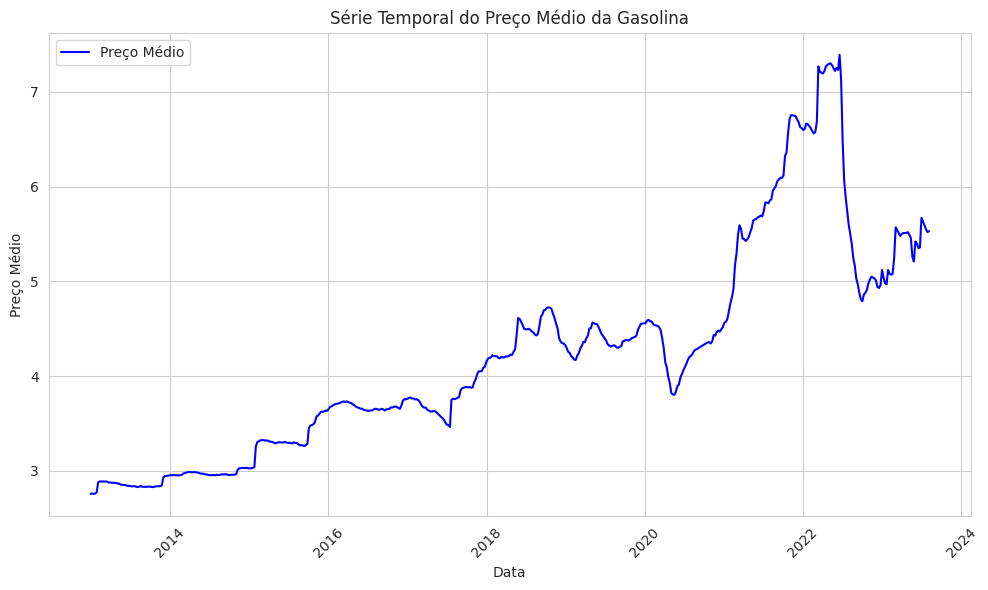

In [ ]:
'''
Plotando um gráfico de linha dos preços médios semanais ao longo do tempo. Isso pode ajudar a identificar visualmente quaisquer valores extremos.
'''
# Configurar o estilo Seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))


sns.lineplot(data=dataframe, x='DATA', y='PRECOMEDIO', color='b', label='Preço Médio')

plt.xlabel('Data')
plt.ylabel('Preço Médio')
plt.title('Série Temporal do Preço Médio da Gasolina')
plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

          DATA  PRECOMEDIO
471 2022-03-13       7.267
472 2022-03-20       7.210
473 2022-03-27       7.202
474 2022-04-03       7.192
475 2022-04-10       7.219
476 2022-04-17       7.270
477 2022-04-24       7.283
478 2022-05-01       7.295
479 2022-05-08       7.300
480 2022-05-15       7.280
481 2022-05-22       7.250
482 2022-05-29       7.220
483 2022-06-05       7.250
484 2022-06-12       7.230
485 2022-06-19       7.390
486 2022-06-26       7.130


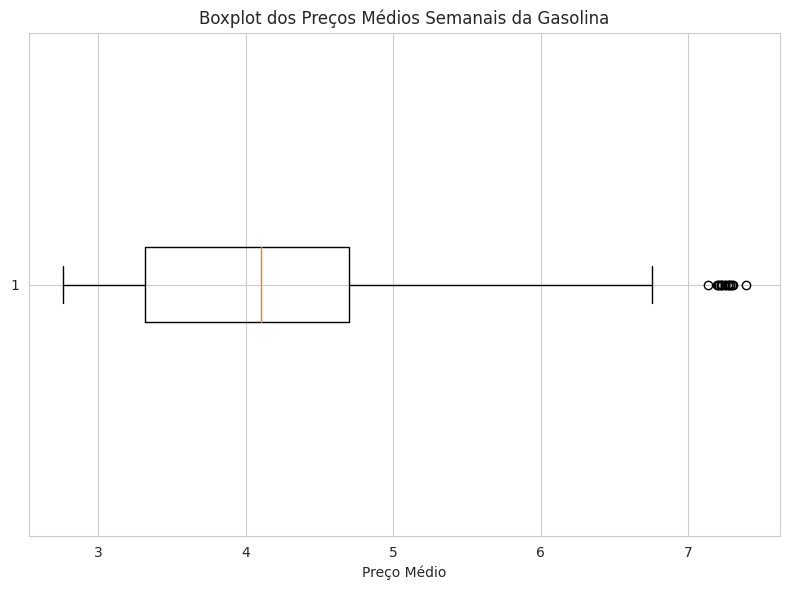

In [ ]:
'''
O método IQR (Interquartile Range) é uma técnica estatística usada para identificar outliers em um conjunto de dados.
Ele se baseia na diferença entre o terceiro quartil (75º percentil) e o primeiro quartil (25º percentil) dos dados.
O IQR representa a variação dos dados dentro do intervalo que abrange a maioria das observações (50% central dos dados).
'''
# Calcular o IQR (Interquartile Range)
Q1 = dataframe['PRECOMEDIO'].quantile(0.25)
Q3 = dataframe['PRECOMEDIO'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = dataframe[(dataframe['PRECOMEDIO'] < limite_inferior) | (dataframe['PRECOMEDIO'] > limite_superior)]

print(outliers)

plt.figure(figsize=(8, 6))
plt.boxplot(dataframe['PRECOMEDIO'], vert=False)
plt.title('Boxplot dos Preços Médios Semanais da Gasolina')
plt.xlabel('Preço Médio')
plt.tight_layout()
plt.show()

# **Será feito a Imputação pela remoção para tratar os OUTLIERS**

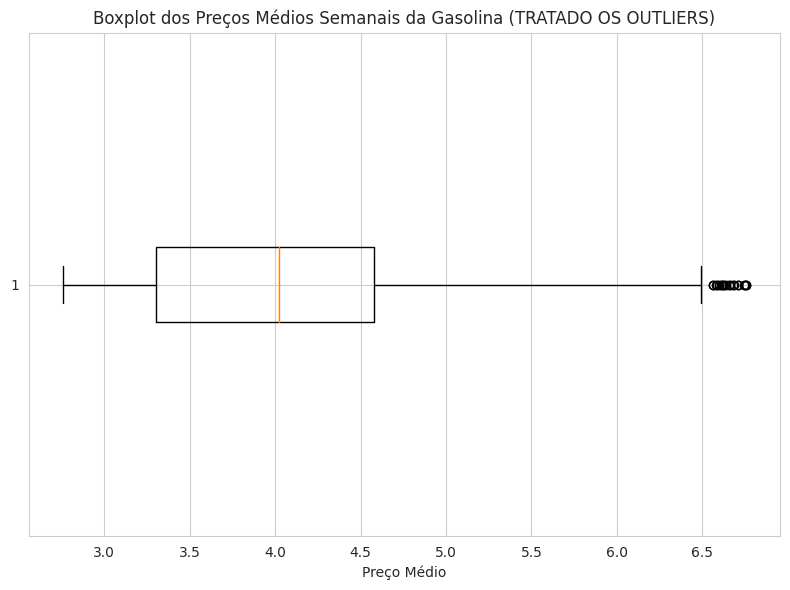

In [ ]:
# Imputar OUTLIERS pela média da coluna 'PRECOMEDIO'
dataframe = dataframe.drop(outliers.index)

plt.figure(figsize=(8, 6))
plt.boxplot(dataframe['PRECOMEDIO'], vert=False)
plt.title('Boxplot dos Preços Médios Semanais da Gasolina (TRATADO OS OUTLIERS)')
plt.xlabel('Preço Médio')
plt.tight_layout()
plt.show()

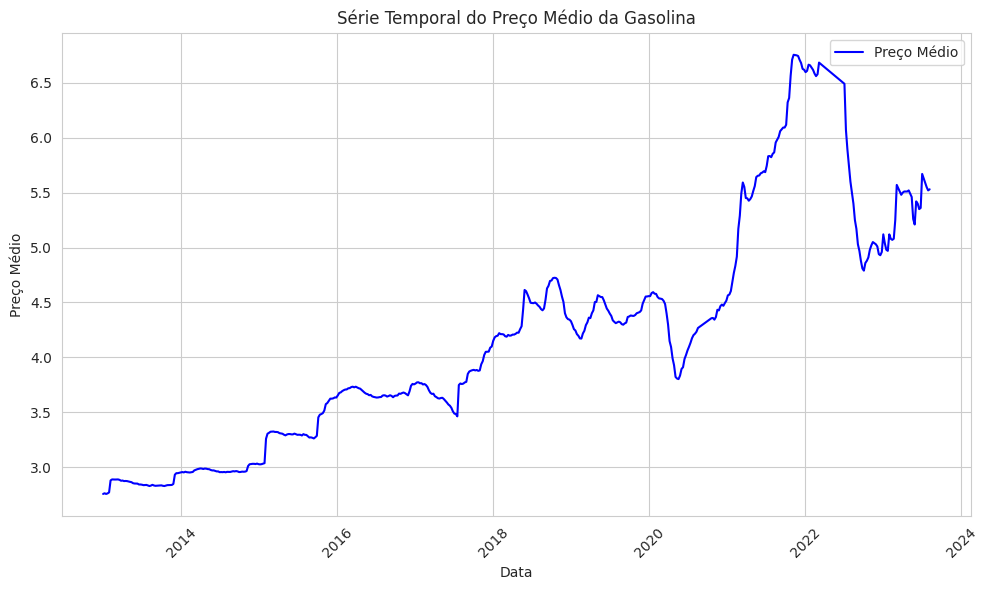

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

sns.lineplot(data=dataframe, x='DATA', y='PRECOMEDIO', color='b', label='Preço Médio')

plt.xlabel('Data')
plt.ylabel('Preço Médio')
plt.title('Série Temporal do Preço Médio da Gasolina')
plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# **Gráficos para visualização da serie temporal:**

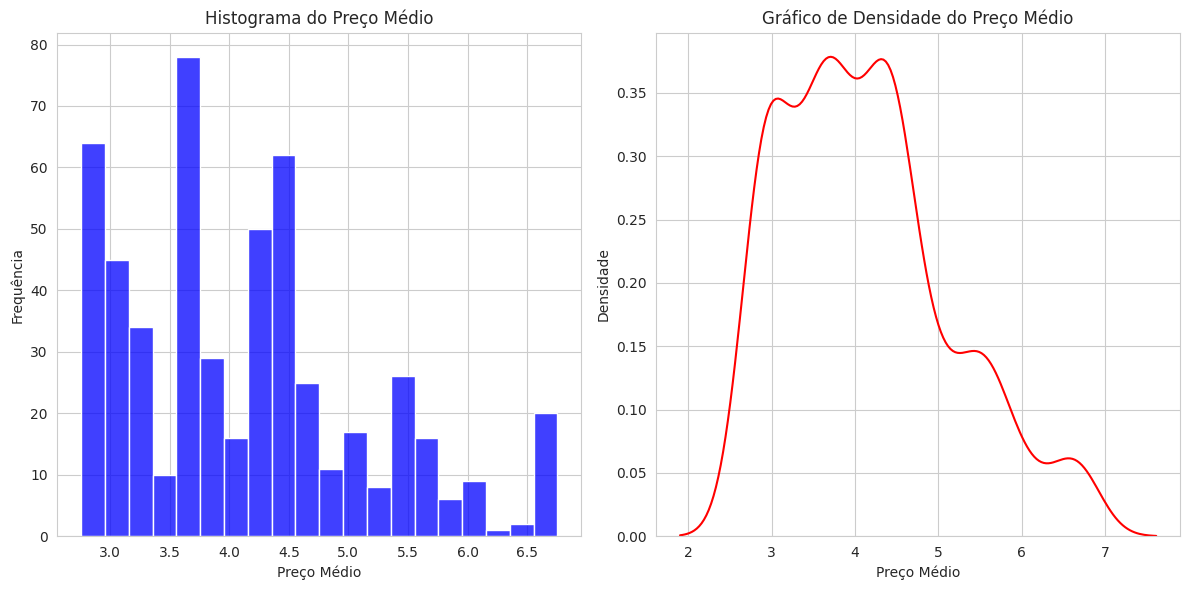

In [ ]:
plt.figure(figsize=(12, 6))

# Plotar o histograma
plt.subplot(1, 2, 1)
sns.histplot(data=dataframe, x='PRECOMEDIO', kde=False, color='b', bins=20)
plt.xlabel('Preço Médio')
plt.ylabel('Frequência')
plt.title('Histograma do Preço Médio')

# Plotar o gráfico de densidade
plt.subplot(1, 2, 2)
sns.kdeplot(data=dataframe, x='PRECOMEDIO', color='r')
plt.xlabel('Preço Médio')
plt.ylabel('Densidade')
plt.title('Gráfico de Densidade do Preço Médio')

# Ajustar o layout dos subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()

# **Normalizando pelo método Min-Max**

          DATA  PRECOMEDIO
0   2012-12-30    0.000000
1   2013-01-06    0.001502
2   2013-01-13    0.000000
3   2013-01-20    0.001251
4   2013-01-27    0.003504
..         ...         ...
540 2023-07-09    0.718719
541 2023-07-16    0.708709
542 2023-07-23    0.698699
543 2023-07-30    0.691191
544 2023-08-06    0.693694

[529 rows x 2 columns]


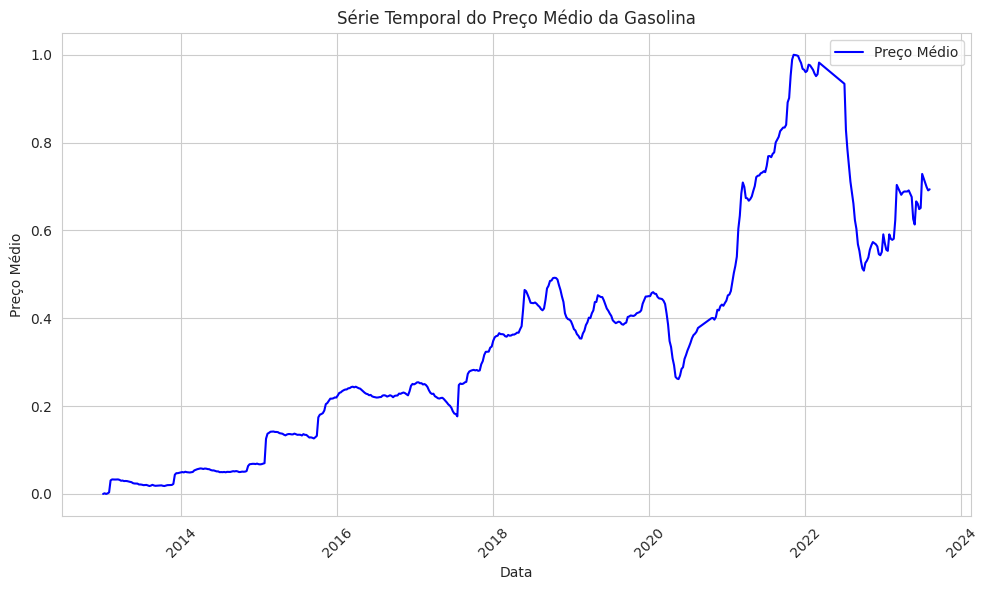

In [ ]:
scaler = MinMaxScaler()

dataframe['PRECOMEDIO'] = scaler.fit_transform(dataframe[['PRECOMEDIO']])

print(dataframe)

plt.figure(figsize=(10, 6))

sns.lineplot(data=dataframe, x='DATA', y='PRECOMEDIO', color='b', label='Preço Médio')

plt.xlabel('Data')
plt.ylabel('Preço Médio')
plt.title('Série Temporal do Preço Médio da Gasolina')
plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()